In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
out_dir = '/Users/tanshi/Desktop/SIP/'
execfile(out_dir+'plot_routines.py')

In [2]:
UV_besancon = np.loadtxt(out_dir+'besancanCMDdata.txt', usecols=(0),unpack=True)
print UV_besancon
print len(UV_besancon)

mv_besancon = np.loadtxt(out_dir+'besancanCMDdata.txt', usecols=(1),unpack=True)
print mv_besancon
print len(mv_besancon)

distance_besancon = np.loadtxt(out_dir+'besancanCMDdata.txt', usecols=(2),unpack=True)
print distance_besancon

[ 1.018  0.685  0.992 ... -0.402 -0.389 -0.614]
1997
[20.595 20.217 21.284 ... 23.994 24.281 24.396]
1997
[0.091 0.111 0.131 ... 2.915 3.515 4.315]


In [3]:
Mv_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(3),unpack=True)
print(Mv_6)

[18.984 18.491 18.097 17.774 17.51  17.285 17.082 16.883 16.684 16.478
 16.257 16.012 15.742 15.462 15.178 14.909 14.658 14.222 13.865 13.557
 13.281 13.023 12.783 12.554 12.342 12.149 11.977 11.834 11.714 11.615
 11.544 11.476 11.406 11.336 11.27  11.207 11.148 11.09  11.036 10.982
 10.682 10.241  9.814  9.433  9.19   8.986  8.793  8.616  8.446  8.286
  8.126  7.968  7.795  7.589  7.388  7.183  6.951]


In [4]:
UB_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(4),unpack=True)
print(UB_6)

BV_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(5),unpack=True)
print(BV_6)

UV_6 = UB_6 + BV_6
print(UV_6)

[ 1.113  0.944  0.813  0.702  0.604  0.522  0.453  0.39   0.33   0.272
  0.211  0.146  0.075  0.    -0.076 -0.149 -0.216 -0.335 -0.439 -0.515
 -0.563 -0.591 -0.602 -0.603 -0.597 -0.588 -0.582 -0.582 -0.587 -0.591
 -0.596 -0.603 -0.616 -0.633 -0.652 -0.672 -0.694 -0.715 -0.736 -0.757
 -0.87  -1.005 -1.106 -1.166 -1.196 -1.213 -1.225 -1.234 -1.241 -1.247
 -1.253 -1.257 -1.261 -1.264 -1.268 -1.271 -1.274]
[ 1.418  1.423  1.384  1.336  1.285  1.234  1.189  1.143  1.099  1.052
  1.002  0.948  0.887  0.823  0.757  0.694  0.636  0.533  0.445  0.374
  0.322  0.283  0.255  0.236  0.224  0.215  0.207  0.197  0.187  0.177
  0.167  0.154  0.138  0.12   0.102  0.082  0.065  0.049  0.034  0.021
 -0.046 -0.127 -0.193 -0.237 -0.26  -0.275 -0.286 -0.294 -0.301 -0.306
 -0.312 -0.316 -0.32  -0.324 -0.327 -0.33  -0.333]
[ 2.531  2.367  2.197  2.038  1.889  1.756  1.642  1.533  1.429  1.324
  1.213  1.094  0.962  0.823  0.681  0.545  0.42   0.198  0.006 -0.141
 -0.241 -0.308 -0.347 -0.367 -0.373 -0.373 -0.

Text(0,0.5,'mv')

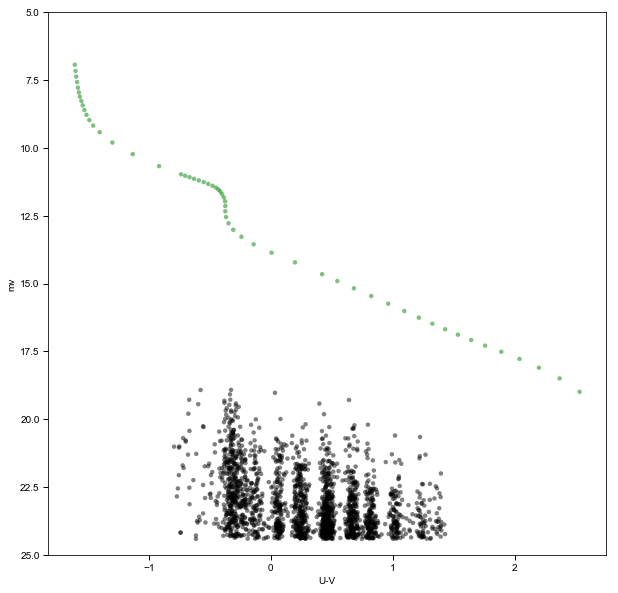

In [5]:
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_besancon, mv_besancon, c='black',edgecolors='none',s=20,alpha=0.5)
plt.scatter(UV_6, Mv_6, c='green',edgecolors='none',s=20,alpha=0.5)
plt.ylim(25,5)
plt.xlabel('U-V')
plt.ylabel('mv')

In [6]:
Mv_wd = np.array([])
for j in range(len(UV_besancon)):
    check = False
    for i in range(len(UV_6)):
        if (UV_besancon[j] < UV_6[i]) and (UV_besancon[j] > UV_6[i+1]):
            weight1 = ((UV_6[i] - UV_besancon[j]) / (UV_6[i] - UV_6[i+1])) * 100
            weight2 = ((UV_besancon[j] - UV_6[i+1]) / (UV_6[i] - UV_6[i+1])) * 100
            Mv_wd = np.append(Mv_wd, ((Mv_6[i]*weight2) + (Mv_6[i+1]*weight1)) / (weight1 + weight2))
            check = True
        elif (UV_besancon[j] == UV_6[i]):
            Mv_wd = np.append(Mv_wd, Mv_6[i])
            check = True
            break
print(Mv_wd)
print(len(Mv_wd))
# for i in range(len(Mv_wd)):
#     print Mv_wd[i]

[15.85654545 15.186      15.80336364 ... 11.69985714 11.802
 11.17069231]
1997


In [7]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Distance Modulus: mv - Mv = 5logD - 5
print len(mv_besancon)
print len(Mv_wd)
distance_wd_kpc = np.array([])
for i in range(len(mv_besancon)):
    distance_wd_kpc = np.append(distance_wd_kpc, (10 ** (((mv_besancon[i] - Mv_wd[i]) + 5) / 5)/1000))
print np.max(distance_wd_kpc)
print(distance_besancon)

1997
1997
4.416330212344653
[0.091 0.111 0.131 ... 2.915 3.515 4.315]


In [28]:
percent_error = np.array([])
for i in range (len(distance_besancon)):
    percent_error = np.append(percent_error, abs(distance_wd_kpc[i] - distance_besancon[i])/distance_besancon[i]*100)
print
print np.mean(abs(distance_wd_kpc - distance_besancon)/distance_besancon*100)
print percent_error
print np.max(percent_error)


6.9849505676309604
[ 2.57968785  8.61455705  4.75197547 ...  1.32889034 10.90062233
  2.34832474]
84.92708010027428


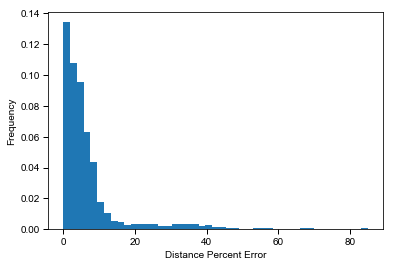

In [34]:
plt.hist(percent_error,45,histtype='stepfilled',density=True)
plt.xlabel('Distance Percent Error')
plt.ylabel('Frequency')
plt.savefig(out_dir+'error_besancon_dist.jpg',dpi=300)